# 3. Contoh fitting garis emisi, mengukur equivalent width dan fluks

## Fitting spektrum terhadap kontinum

Cara fitting ini hanya dapat digunakan untuk rentang spektrum yang tidak lebar atau untuk spektrum degnan kontinum yang lemah (misal: spektrum planetary nebula).

Sebagai contoh, kita akan gunakan spektrum IC 418. 
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/Spirograph_Nebula_-_Hubble_1999.jpg" style="width: 150px;"/>

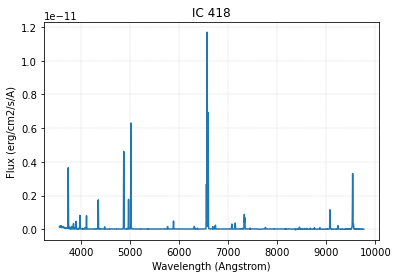

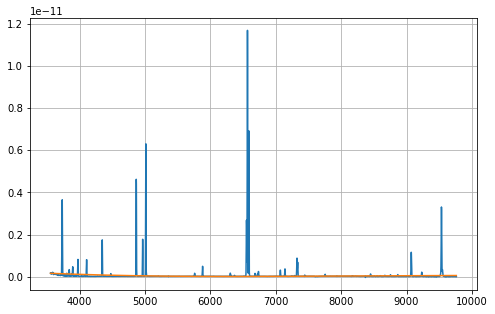

In [2]:
import astropy.units as u
from specutils import Spectrum1D
import numpy as np
import matplotlib.pyplot as plt

from specutils import Spectrum1D, SpectralRegion #spectrum1D (specutils)
from astropy.modeling import models, fitting
from specutils.fitting import fit_generic_continuum

fluxunit = u.erg / (u.cm ** 2 * u.s)

file = np.loadtxt("ic418.csv", delimiter = ",").T  # no reason to convert to a list
wave = file[0] * u.AA
flux = file[1] * fluxunit

spec = Spectrum1D(spectral_axis=wave, flux=flux)

#Visualize continuum fitting
x = spec.spectral_axis
y = spec.flux

#fitting continuum (with exclude region between 4800 and 5100A)
g1_fit = fit_generic_continuum(spec, exclude_regions=[SpectralRegion(4800 * u.AA, 5100 * u.AA),SpectralRegion(6500 * u.AA, 6600 * u.AA)])
y_continuum_fitted = g1_fit(x)


#plot spectrum
fig, ax = plt.subplots() 
ax.plot(spec.spectral_axis, spec.flux)  
ax.set_xlabel("Wavelength (Angstrom)")  
ax.set_ylabel("Flux (erg/cm2/s/A)") 
ax.grid(color='grey', alpha=0.8, linestyle='-.', linewidth=0.2, axis='both') 
ax.set_title("IC 418", loc='center', fontsize=12, fontweight=0.5)

fig10, ax10 = plt.subplots(figsize=(8,5))
#spectrum
ax10.plot(x, y)
#continuum
ax10.plot(x, y_continuum_fitted)
ax10.grid(True)
#plt.show()

#Show Plot
plt.show()

## Mendeteksi garis emisi

In [1]:
import astropy.units as u
from specutils import Spectrum1D
import numpy as np

from specutils import Spectrum1D, SpectralRegion #spectrum1D (specutils)
from astropy.modeling import models, fitting
from specutils.fitting import fit_generic_continuum

from specutils.fitting import find_lines_derivative
from specutils.fitting import fit_lines

fluxunit = u.erg / (u.cm ** 2 * u.s)

file = np.loadtxt("ic418.csv", delimiter = ",").T  # no reason to convert to a list
wave = file[0] * u.AA
flux = file[1] * fluxunit

spec = Spectrum1D(spectral_axis=wave, flux=flux)

#Visualize continuum fitting
x = spec.spectral_axis
y = spec.flux

#fitting continuum (with exclude region between 4800 and 5100A)
g1_fit = fit_generic_continuum(spec, exclude_regions=[SpectralRegion(4800 * u.AA, 5100 * u.AA),SpectralRegion(6500 * u.AA, 6600 * u.AA)])
y_continuum_fitted = g1_fit(x)

#divide spectrum by his continuum
y_cont_fitted = g1_fit(x)
spec_normalized = spec / y_cont_fitted 

#emission line detections
lines = find_lines_derivative(spec_normalized, flux_threshold=10)
print('emission: ', lines[lines['line_type'] == 'emission']) 



If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]


emission:    line_center    line_type line_center_index
    Angstrom                                
---------------- --------- -----------------
3730.04781150818  emission               120
 4342.4249200821  emission               532
4864.13454413415  emission               883
 4962.2337896824  emission               949
5009.79706025125  emission               981
5877.82674813272  emission              1565
 6302.9234788418  emission              1851
6551.14429712298  emission              2018
6564.52146697047  emission              2027
6585.33039784434  emission              2041
6733.96561837199  emission              2141
 7068.3948645592  emission              2366
 7138.2534182072  emission              2413
7322.56109166148  emission              2537
7332.96555709842  emission              2544
9071.99763727192  emission              3714
9534.25317311291  emission              4025


## Menghitung FWHM dan fluks


If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]


center :  6564.436951866357 Angstrom
fwhm :  7.587669659389576 Angstrom
line flux :  1.2581947413075268e-10 Angstrom erg / (cm2 s)
equivalent width :  -8285.213467247695 Angstrom


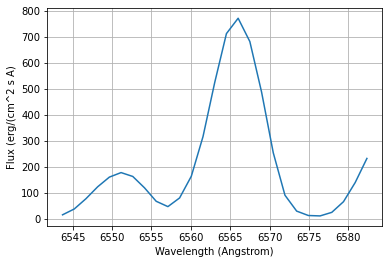

In [10]:
import astropy.units as u
from specutils import Spectrum1D
import numpy as np
import matplotlib.pyplot as plt

from specutils import Spectrum1D, SpectralRegion #spectrum1D (specutils)
from astropy.modeling import models, fitting
from specutils.fitting import fit_generic_continuum

from specutils.fitting import find_lines_derivative
from specutils.fitting import fit_lines

from specutils.manipulation import extract_region
from specutils.fitting import estimate_line_parameters
from specutils.analysis import centroid, fwhm
from specutils.analysis import line_flux
from specutils.analysis import equivalent_width

fluxunit = u.erg / (u.cm ** 2 * u.s)

file = np.loadtxt("ic418.csv", delimiter = ",").T  # no reason to convert to a list
wave = file[0] * u.AA
flux = file[1] * fluxunit

spec = Spectrum1D(spectral_axis=wave, flux=flux)

#Visualize continuum fitting
x = spec.spectral_axis
y = spec.flux

#fitting continuum (with exclude region between 4800 and 5100A)
g1_fit = fit_generic_continuum(spec, exclude_regions=[SpectralRegion(4800 * u.AA, 5100 * u.AA),SpectralRegion(6500 * u.AA, 6600 * u.AA)])
y_continuum_fitted = g1_fit(x)

#divide spectrum by his continuum
y_cont_fitted = g1_fit(x)
spec_normalized = spec / y_cont_fitted 

#emission line detections
lines = find_lines_derivative(spec_normalized, flux_threshold=10)
#print('emission: ', lines[lines['line_type'] == 'emission']) 

#spectral region - line analysis: line center & FWHM
sr =  SpectralRegion((6563-20)*u.AA, (6563+20)*u.AA)

#print centroid - need a spectrum and a spectral region in parameters
center = centroid(spec_normalized, sr)  
print("center : ", center)

#print fwhm - need a spectrum and a spectral region in parameters
fwhm_spec = fwhm(spec_normalized, regions=sr)
print("fwhm : ", fwhm_spec)

#line flux
fluks = line_flux(spec, sr)
print("line flux : ", fluks)

#equivalent width
ew = equivalent_width(spec_normalized, regions=sr) 
print("equivalent width : ", ew)


#create a new spectrum of the selected region for plot
sub_spectrum = extract_region(spec_normalized, sr)
Ha_line = Spectrum1D(flux=sub_spectrum.flux,spectral_axis=sub_spectrum.spectral_axis)


#plot spectrum
fig, ax = plt.subplots() 
ax.plot(Ha_line.spectral_axis, Ha_line.flux)
ax.set_xlabel("Wavelength (Angstrom)")  
ax.set_ylabel("Flux (erg/(cm^2 s A)") 
ax.grid(True)
plt.show()
#Show Plot
plt.show()